In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://en.wikipedia.org/wiki/List_of_best-selling_manga"
resp = requests.get(url, headers={"User-Agent": "manga-demo/0.1"})
soup = BeautifulSoup(resp.text, "lxml")

tables = soup.find_all("table", class_="wikitable")

df1 = pd.read_html(str(tables[0]))[0]
df2 = pd.read_html(str(tables[1]))[0]

df = pd.concat([df1, df2])

sales_col = df.iloc[:,6]
df["Sales_Millions"] = (
    sales_col
    .str.split() 
    .str[0]       
    .astype(float)
)


/var/folders/wf/jr9cvn3x32gf3ccg9m_ssrn40000gn/T/ipykernel_3236/2512293055.py:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df1 = pd.read_html(str(tables[0]))[0]
/var/folders/wf/jr9cvn3x32gf3ccg9m_ssrn40000gn/T/ipykernel_3236/2512293055.py:14: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df2 = pd.read_html(str(tables[1]))[0]


In [54]:
df

,Manga series,Author(s),Publisher,Demographic,No. of collected volumes,Serialized,Approximate sales,Sales_Millions
0,One Piece,Eiichiro Oda,Shueisha,Shōnen,112,1997–present,516.6 million†‡[1],516.6
1,Doraemon,Fujiko F. Fujio,Shogakukan,Children,45,1969–1996,300 million[2],300.0
2,Golgo 13,"Takao Saito, Saito Production",Shogakukan,Seinen,217,1968–present,300 million†[3],300.0
3,Case Closed / Detective Conan,Gosho Aoyama,Shogakukan,Shōnen,107,1994–present,270 million†[4],270.0
4,Dragon Ball,Akira Toriyama,Shueisha,Shōnen,42,1984–1995,260 million[5],260.0
...,...,...,...,...,...,...,...,...
33,Inuyasha,Rumiko Takahashi,Shogakukan,Shōnen,56,1996–2008,50 million†[57],50.0
34,Nana,Ai Yazawa,Shueisha,Shōjo,21,2000–2009 (on hiatus),50 million†[58],50.0
35,Saint Seiya,Masami Kurumada,Shueisha,Shōnen,28,1985–1990,50 million[59],50.0
36,Shoot!,Tsukasa Ōshima,Kodansha,Shōnen,33,1990–2003,50 million†[60],50.0


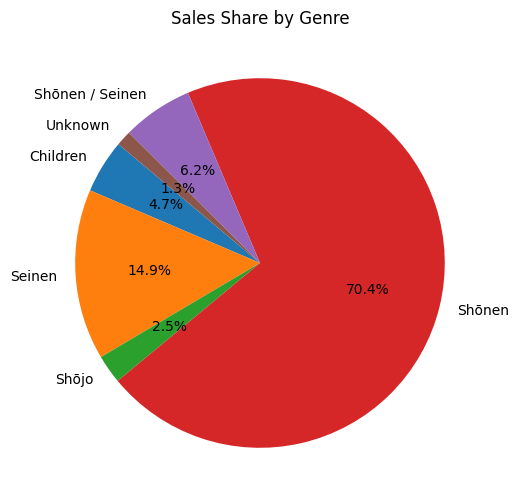

In [74]:
import matplotlib.pyplot as plt
demo_sales = df.groupby("Demographic")["Sales_Millions"].sum()
plt.figure(figsize=(6,6))
plt.pie(
    demo_sales,
    labels=demo_sales.index,
    autopct="%1.1f%%",
    startangle=140
)
plt.title("Sales Share by Genre")
plt.show()

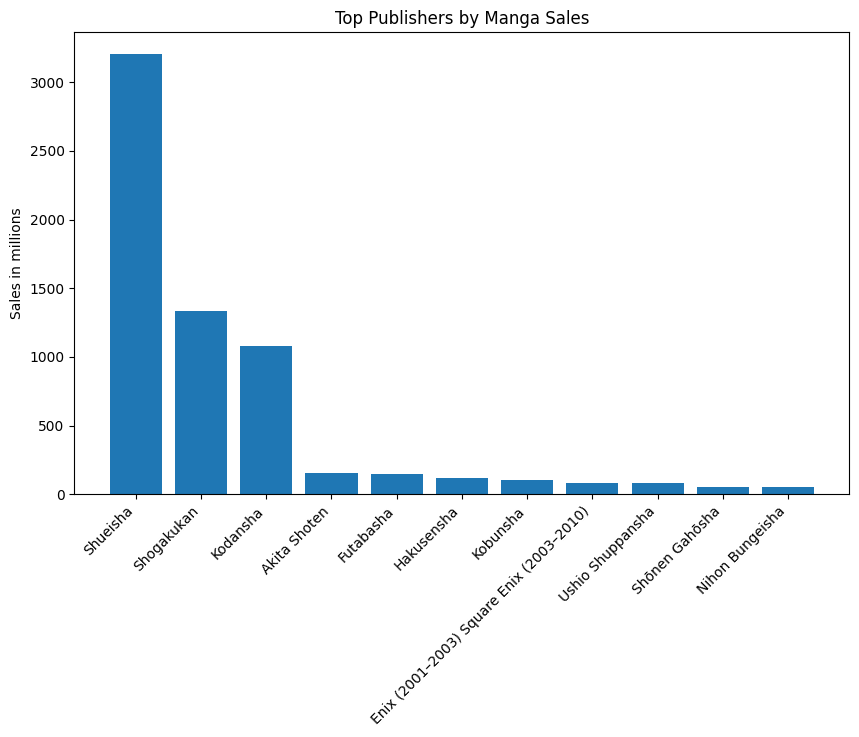

In [75]:
pub = df.groupby("Publisher")["Sales_Millions"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.bar(pub.index, pub.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Sales in millions")
plt.title("Top Publishers by Manga Sales")
plt.show()